# W8 Microblog
# Applying logistic regression for classifying human-machine dialogue and human-human dialogue

Logistic Regression雖然名為迴歸，但常⽤於分類（⼆元或多類別）

人與對話機器人的對話取自[chatterbot訓練資料集](https://github.com/gunthercox/chatterbot-corpus)，人與人之間的對話取自[騰訊AI Lab 對話資料集](http://ai.tencent.com/ailab/upload/PapersUploads/A_Manually_Annotated_Chinese_Corpus_for_Non-task-oriented_Dialogue_System)，可參考[這篇](https://arxiv.org/pdf/1805.05542.pdf)論文。從兩資料集各隨機取出50 組單輪對話(均沒有特定主題)。接下來擷取兩組對話的量化特徵(詞彙豐富度、對話長度、句子平均長度、虛詞使用比率、各詞類使用頻率等等)共24個，將這些特徵視為X, 是否為人機對話為Y (是：1, 否：0)，藉此分類人人對話與人機對話。

In [17]:
from sklearn import preprocessing, linear_model
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei' #⿊體

讀入資料

In [2]:
data = pd.read_excel('sample_50_anno.xlsx',sheet_name = None) 
lrdata=data.get('lr_data') # get a specific sheet to DataFrame

用
'Text Length','Different Words','Entropy','Simpson Index','Sentence Count','Sentence Length Average','Sentence Length Variance','Function Word Count','Function Word proportion','TTR','Na','Nb','Nc','Nd','Nh','D','T','VA','VB','VC','VD','VE','VH','C'這些數值資料來預測是否為人機對話

In [3]:
df=lrdata[['Text Length','Different Words','Entropy','Simpson Index','Sentence Count','Sentence Length Average','Sentence Length Variance','Function Word Count','Function Word Proportion','TTR','Na','Nb','Nc','Nd','Nh','D','T','VA','VB','VC','VD','VE','VH','C','Machine']]
df.head()

,Text Length,Different Words,Entropy,Simpson Index,Sentence Count,Sentence Length Average,Sentence Length Variance,Function Word Count,Function Word Proportion,TTR,...,D,T,VA,VB,VC,VD,VE,VH,C,Machine
0,23,10,2.262386,0.107266,15,1.533333,0.466667,6,0.260870,0.435000,...,0,0,0,0,0,0,1,2,0,0
1,29,14,2.553682,0.085000,18,1.611111,6.277778,5,0.172414,0.482759,...,2,0,0,0,3,0,0,3,0,0
2,51,22,2.655133,0.129291,25,2.040000,7.240000,2,0.039216,0.431373,...,2,0,0,0,3,0,0,2,0,0
3,12,8,2.043192,0.135802,7,1.714286,3.428571,0,0.000000,0.666667,...,0,0,0,0,1,0,0,1,0,0
4,9,8,2.043192,0.135802,9,1.000000,0.000000,4,0.444444,0.888889,...,2,1,0,0,0,0,0,0,0,0


切分訓練、測試資料

In [4]:
x=df[['Text Length','Different Words','Entropy','Simpson Index','Sentence Count','Sentence Length Average','Sentence Length Variance','Function Word Count','Function Word Proportion','TTR','Na','Nb','Nc','Nd','Nh','D','T','VA','VB','VC','VD','VE','VH','C']]
y=df[['Machine']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2019) 

x_train

,Text Length,Different Words,Entropy,Simpson Index,Sentence Count,Sentence Length Average,Sentence Length Variance,Function Word Count,Function Word Proportion,TTR,...,Nh,D,T,VA,VB,VC,VD,VE,VH,C
95,44,29,3.297037,0.040175,7,6.285714,215.428571,12,0.272727,0.659091,...,3,1,0,0,0,0,0,0,1,2
47,13,10,2.138397,0.147929,9,1.444444,0.555556,2,0.153846,0.769231,...,0,0,1,1,0,1,0,0,0,0
14,15,8,2.043192,0.135802,9,1.666667,0.333333,0,0.000000,0.533333,...,0,3,0,3,0,1,0,0,0,0
81,12,9,2.197225,0.111111,2,6.000000,18.000000,0,0.000000,0.750000,...,3,4,0,4,0,0,0,0,1,0
90,14,12,2.484907,0.083333,2,7.000000,8.000000,2,0.142857,0.857143,...,1,0,0,0,0,0,0,0,1,0
2,51,22,2.655133,0.129291,25,2.040000,7.240000,2,0.039216,0.431373,...,0,2,0,0,0,3,0,0,2,0
22,33,19,2.902002,0.057851,20,1.650000,12.550000,3,0.090909,0.575758,...,1,3,1,0,0,2,0,0,3,0
77,44,38,3.612136,0.027960,2,22.000000,450.000000,7,0.159091,0.863636,...,0,0,0,0,0,3,0,1,0,1
78,19,16,2.751667,0.065744,2,9.500000,12.500000,2,0.105263,0.842105,...,2,5,0,0,0,2,0,0,1,0
41,12,6,1.747868,0.183673,7,1.714286,0.285714,2,0.166667,0.500000,...,1,3,1,0,0,0,0,0,0,0


標準化 :為了避免偏向某個變數去做訓練

In [5]:
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()

sc.fit(x_train)

x_train_nor=sc.transform(x_train)
x_test_nor=sc.transform(x_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


訓練資料分類效果(3個參數)

In [23]:
from sklearn.linear_model  import LogisticRegression
import math
lr=LogisticRegression()
lr.fit(x_train_nor,y_train)

# 印出係數
print(lr.coef_)
#印出24個檢定變數的顯著性，以 P-value 是否小於 0.05（信心水準 95%）來判定
print(f_regression(x_train_nor,y_train)[1])
# 印出截距
print(lr.intercept_ )


[[ 0.05073646  0.16110099  0.5169015  -0.71144527 -1.88462048  1.16090357
   0.0333939   0.24978403  0.19895375  0.952695   -0.25788532  0.26413467
  -0.34617137 -0.36122929  0.57772752 -0.00945377 -0.10280697 -0.28001234
   0.         -0.52968175 -0.06851578 -0.21853065  0.22126113 -0.07297395]]
[1.59650601e-01 6.90901540e-03 2.35938438e-05 9.17292701e-06
 4.23644597e-09 1.15729405e-08 7.59778174e-02 3.20619794e-02
 1.09218594e-01 3.39824140e-13 2.38475771e-01 1.16056518e-01
 8.96529128e-01 6.63765503e-01 7.02383648e-03 3.75252408e-01
 6.51157050e-02 6.93987446e-01            nan 3.33110705e-02
 2.40812687e-01 7.72496060e-01 8.17869677e-01 4.91588646e-01]
[0.55797716]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid va

分別計算是人機對話的機率、不是人機對話的機率

In [9]:
np.round(lr.predict_proba(x_test_nor),3)

array([[0.004, 0.996],
       [0.927, 0.073],
       [0.967, 0.033],
       [0.96 , 0.04 ],
       [0.021, 0.979],
       [0.   , 1.   ],
       [0.9  , 0.1  ],
       [0.858, 0.142],
       [0.82 , 0.18 ],
       [0.992, 0.008],
       [0.984, 0.016],
       [0.464, 0.536],
       [0.97 , 0.03 ],
       [0.988, 0.012],
       [0.473, 0.527],
       [0.113, 0.887],
       [0.933, 0.067],
       [0.991, 0.009],
       [0.812, 0.188],
       [0.869, 0.131],
       [0.996, 0.004],
       [0.903, 0.097],
       [0.002, 0.998],
       [0.133, 0.867],
       [0.957, 0.043],
       [0.45 , 0.55 ],
       [0.203, 0.797],
       [0.002, 0.998],
       [0.992, 0.008],
       [0.85 , 0.15 ]])

模型績效: 評估分類模型的好壞--用混淆矩陣

PS: 要使用視覺化混淆矩陣要先執行以下的code (官網提供的)


In [10]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(y_test, lr.predict(x_test_nor))
print('混淆矩陣：', cnf)

混淆矩陣： [[19  2]
 [ 0  9]]


Confusion matrix, without normalization
[[19  2]
 [ 0  9]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


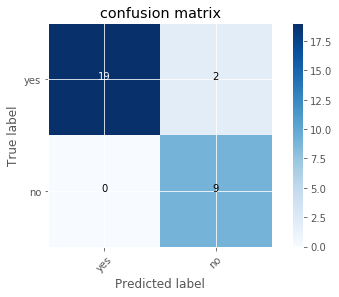

In [12]:
import itertools
target_name=['yes','no']
plot_confusion_matrix(cnf,classes=target_name,title='confusion matrix')
plt.show()

In [13]:
#準確（分類）率
Accuracy= (19+9)/(19+9+2+0)
print(Accuracy)

0.9333333333333333


In [14]:
#命中率
precision=9/11
print(precision)

0.8181818181818182


In [15]:
#覆蓋率或者靈敏度
recall=9/9
print(recall)

1.0


In [16]:
F1=2/2.22222222222
print(F1)

0.9000000000009


Reference
* [Python機器學習(scikit-learn) --Logistic Regression](http://to52016.pixnet.net/blog/post/343519054-%5Bpython%5D-logistic-regression%28%E7%BE%85%E5%90%89%E6%96%AF%E8%BF%B4%E6%AD%B8%29)
* [如何辨別機器學習模型的好壞？秒懂Confusion Matrix](https://www.ycc.idv.tw/confusion-matrix.html)
* [第 22 天機器學習（2）複迴歸與 Logistic 迴歸](https://ithelp.ithome.com.tw/articles/10187047)